In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression
from sklearn.metrics import accuracy_score  # Import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns  # Import seaborn for heatmap
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score


# Replace 'path_to_your_file.csv' with the actual path to your dataset file
file_path = 'C:/Users/CNLAB15/Desktop/diabetes.csv'

# Read the dataset into a Pandas DataFrame
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
    # Display the first 5 rows of the dataset
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file at {file_path} was not found.")
except pd.errors.EmptyDataError:
    print(f"Error: The file at {file_path} is empty.")
except pd.errors.ParserError:
    print(f"Error: There was an issue parsing the file at {file_path}. Ensure it is a valid CSV.")
    



Dataset loaded successfully!
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [13]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [18]:
df.fillna(df.mean(), inplace=True)
X = df.drop(columns=['Outcome'])  
Y = df['Outcome']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)


logreg = LogisticRegression()


logreg.fit(X_train_scaled, Y_train)


y_train_pred = logreg.predict(X_train_scaled)


y_test_pred = logreg.predict(X_test_scaled)


train_accuracy = accuracy_score(Y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')




Training Accuracy: 77.04%


In [19]:
test_accuracy = accuracy_score(Y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')


Testing Accuracy: 75.32%


In [21]:
# Import necessary metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Calculate Precision, Recall, and Confusion Matrix for training data
train_precision = precision_score(Y_train, y_train_pred)
train_recall = recall_score(Y_train, y_train_pred)
train_cm = confusion_matrix(Y_train, y_train_pred)

# Print Precision, Recall, and Confusion Matrix for training data
print(f'Training Precision: {train_precision:.2f}')
print(f'Training Recall: {train_recall:.2f}')
print('Training Confusion Matrix:')
print(train_cm)


Training Precision: 0.72
Training Recall: 0.56
Training Confusion Matrix:
[[354  47]
 [ 94 119]]


In [33]:
print("Training Classification Report:")
print(classification_report(Y_train, y_train_pred))


Training Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       401
           1       0.72      0.56      0.63       213

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614



In [34]:
print("Testing Classification Report:")
print(classification_report(Y_test, y_test_pred))


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



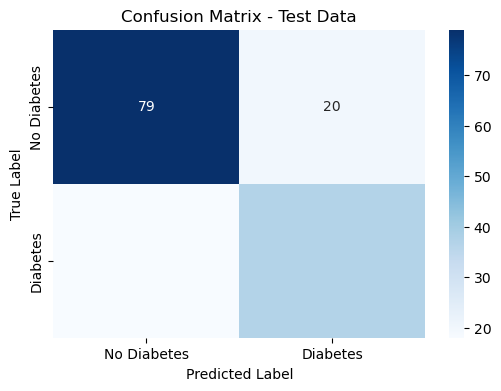

AUC: 0.74


In [39]:
plt.figure(figsize=(6, 4))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test_scaled)[:, 1])

auc = roc_auc_score(Y_test, y_test_pred)
print(f'AUC: {auc:.2f}')

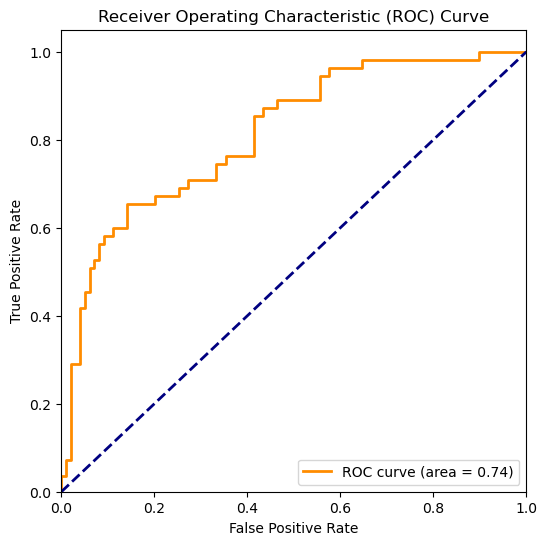

In [40]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()